<a href="https://colab.research.google.com/github/benjarojas/ADA-Informes/blob/main/TopologicalSorting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Topological Sorting

**Entrada:** Grafo dirigido acíclico $G=(V,E)$.

**Salida:** Una asignación $f(v)$ a cada vértice $v\in V$, tal que $ \{ \forall \, (v,w)\in E \} $, se cumple que $f(v)<f(w)$.

El algoritmo de **órden topológico transforma un grafo dirigido acíclico en un órden lineal**. Es muy utilizado ya que tiene muchas aplicaciones, por ejemplo, para **resolver dependencias en proyectos Maven** *(Java)*, **análisis de rutas críticas**, flujos de trabajo en procesos de manufactra, etc.

# 2. Código

## 2.1 Generador de instancias

In [ ]:
from collections import defaultdict
import math
import random

# Crea un grafo sin ciclos de nodos de 0 a V - 1
# Retorna un dicionario [defaultdict(list)] 
# de key valor del nodo (0 a V - 1) y de value una 
# lista con los nodos a los cuales se conecta
def graph_instance_creator(V):
  nodes = random.sample(range(0, V), V)
  div = int(math.ceil(V / 4))

  current_div = div
  graph = defaultdict(list)
  for i in reversed(range(len(nodes))):
    selectables = []
    if (len(nodes) - current_div <= 0):
      selectables = random.sample(nodes, random.randint(1, len(nodes)))
    else:
      population = nodes[:len(nodes)-current_div]
      end = len(population) if len(population) < 4 else 4
      selectables = random.sample(population, random.randint(1, end))
    for selectable in selectables:
      if (nodes[i] != selectable and not selectable in graph[nodes[i]]):
        graph[nodes[i]].append(selectable)
    if (i < len(nodes) - current_div):
      current_div += div

  return graph

## 2.2 Graph to nx.DiGraph

In [ ]:
from collections import defaultdict
import networkx as nx

# Recibe un grafo de tipo [defaultdict(list)]
# Retorna un nx.DiGraph de la libreria networkx
def graph_to_nxdigraph(graph):
  nxdigraph = nx.DiGraph()
  for i in graph.keys():
    nxdigraph.add_node(i)
    for v in graph[i]:
      nxdigraph.add_edge(i, v)
  return nxdigraph

## 2.3 Orden topológico de un grafo acíclico (DFS-iterativo)

In [ ]:
import networkx as nx
from termcolor import colored
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout

def iterTopologicalSort(G, verbose=False, visualize=False):
  if(visualize):
    pos=graphviz_layout(G, prog='dot', root=1) # asignamos posiciones a cada nodo
    nx.draw_networkx_labels(G,pos) # dibujamos el grafo y sus labels
    nx.draw(G,pos, with_labels=False, node_size=1000, font_color="white", font_size=14, font_weight="black", width  =2.0, edge_color ="black")

  # creamos un diccionario de estados e inicializamos en no descubierto
  state = dict()
  for n in G: state[n] = "no descubierto"

  if(verbose):
    print(f"Creamos diccionario de estados 'state' e inicializamos en 'no descubierto'")
    print(f"state: {state}\n")
  
  L = [] # lista auxiliar

  for n in G:
    S=[n]

    if(verbose):
      print(f"\nStack: {colored(str(S), 'blue')}")

    # aplicamos DFS en post-orden
    while len(S)>0:
      n=S.pop()
      if(verbose):
        print(f"Sacamos el nodo {colored(str(n), 'blue')} del stack")
      # primera pasada
      if state[n] == "no descubierto":
        if(verbose):
          print(f"Realizamos primera pasada al nodo: {colored(str(n), 'blue')}")
        if(verbose):
          print(f"Marcamos {colored(str(n), 'blue')} como 'descubierto'")
        state[n] = "descubierto"
        S.append(n)
        if(verbose):
          print(f"Agregamos {colored(str(n), 'blue')} al stack. Stack: {colored(str(S), 'blue')}")
        if(verbose):
          print(f"Buscamos los nodos adyacentes a {colored(str(n), 'blue')}")
        for adj in reversed(list(G[n])):
          if state[adj] == "no descubierto":
            S.append(adj)
            if(verbose):
              print(f"El {colored(str('nodo ' + str(adj)), 'yellow')} adyacente al {colored(str('nodo ' + str(n)), 'blue')} {colored('no ha sido descubierto', 'magenta')}")
              print(f"Agregamos el {colored(str('nodo ' + str(adj)), 'yellow')} al stack. Stack: {colored(str(S), 'blue')}\n")
          else:
            if(verbose):
              print(f"El {colored(str('nodo ' + str(adj)), 'yellow')} adyacente al {colored(str('nodo ' + str(n)), 'blue')} {colored('ya fue visitado.', 'red')}\n")
      
      # realizamos segunda pasada de DFS
      # insertamos en la lista auxiliar de orden topológico
      elif state[n]=="descubierto" and state[n] != "visitado":
        if(verbose):
          print(f"Realizamos segunda pasada al nodo: {colored(str(n), 'blue')}")
          print(f"Marcamos {n} como visitado\n")
        state[n]="visitado"
        L.append(n)
        if(verbose):
          print(f"Insertamos {n} a la lista de orden topológico")
          print(f"L: {L}\n")
      else:
        if(verbose):
          print(f"Nodo {n} ya fue descubierto y visitado!")

  # retornamos la lista al reves
  # que corresponde al orden topológico
  L = list(reversed(L))
  return L      

In [ ]:
G = graph_to_nxdigraph(graph_instance_creator(4)) # ejemplo con instancia aleatoria
print(f"Orden topológico: {iterTopologicalSort(G)}")

Orden topológico: [3, 1, 0]


## 2.4 Orden topológico de un grafo acíclico (DFS-recursivo)

In [ ]:
import networkx as nx
from termcolor import colored
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout

# ordenamos recursivamente e insertamos en el stack
def recSort(G,n,state,stack,verbose=False):
  state[n] = True # marcamos como visitado
  if(verbose): print(f"Marcamos el nodo {colored(str(n), 'blue')} como visitado")
  for adj in G[n]:
    if(verbose): print(f"Buscamos los nodos adyacentes a {colored(str(n), 'blue')}")
    if state[adj] == False:
      if(verbose): print(f"El nodo {colored(str(adj), 'yellow')} adyacente a {colored(str(n), 'blue')} no ha sido visitado")
      if(verbose): print(f"Llamamos recursivamente a la función")
      recSort(G,adj,state,stack,verbose=verbose) # ordenar cada nodo adyacente no visitado
    else:
      if(verbose): print(f"El nodo {colored(str(adj), 'yellow')} adyacente a {colored(str(n), 'blue')} ya fue visitado")

  if(verbose): print(f"Insertamos el nodo {colored(str(n), 'blue')} al stack")
  stack.insert(0,n) # insertamos al principio (push)
  if(verbose): print(f"Stack: {colored(str(stack), 'blue')}")

def recTopologicalSort(G, verbose=False, visualize=False):
  
  if(visualize):
    pos=graphviz_layout(G, prog='dot', root=1) # asignamos posiciones a cada nodo
    nx.draw_networkx_labels(G,pos) # dibujamos el grafo y sus labels
    nx.draw(G,pos, with_labels=False, node_size=1000, font_color="white", font_size=14, font_weight="black", width  =2.0, edge_color ="black")
  state = dict() # diccionario de estados
  for n in G: state[n] = False # inicializamos en False (no visitado)
  stack = []
  for n in G:
    if state[n] == False:
      if(verbose): print(f"Nodo {colored(str(n), 'blue')} no ha sido visitado")
      recSort(G,n,state,stack,verbose=verbose)
    else:
      if(verbose): print(f"Nodo {colored(str(n), 'blue')} ya fue visitado")
  return stack

In [ ]:
G = graph_to_nxdigraph(graph_instance_creator(6)) # ejemplo con instancia aleatoria
print(f"Orden topológico: {recTopologicalSort(G)}")

Orden topológico: [5, 2, 3, 4, 0, 1]


# 3. Descripción de los algoritmos

## 3.1 Algoritmo DFS-iterativo



1.   Primero, creamos una lista auxiliar $L$, que guardará el órden topológico encontrado.
2.   Aplicamos el algoritmo **DFS *(Depth First Search)*** en **post-orden** para cada nodo del grafo.
3.   Cuando **visitamos un nodo** despues de haberlo descubierto, **lo agregamos a $L$.**
4.   Retornamos la **lista auxiliar en reversa, que corresponderá a un órden topológico** para el grafo.


### 3.1.1 Ejemplo de ejecución

Supongamos la siguiente entrada: un grafo $G$ acíclico de tamaño $4$:

![picture](https://i.imgur.com/1ZeLjqH.png)

Creamos un diccionario de estados `state`, que será inicializado en `'no descubierto'`, quedando de la siguiente forma:

$\text{state = }[(3: \text{'no descubierto'}), (1: \text{'no descubierto'}), (2: \text{'no descubierto'}), (0: \text{'no descubierto'})]$

Insertamos el nodo $3$ al stack $S$:

$S = [3]$

Hacemos **pop** al stack, y almacenamos en la variable $n$.

$S=[]$, $n=3$

El nodo $n \, (3)$ está inicializado en `'no descubierto'`, por lo que cambiamos su estado a `'descubierto'` en `state`, quedando

$\text{state = }[(3: \text{'descubierto'}), (1: \text{'no descubierto'}), (2: \text{'no descubierto'}), (0: \text{'no descubierto'})]$

Volvemos a agregar el nodo $3$ al stack $S$ para la segunda pasada.

$S = [3]$

Ahora, buscamos los nodos adyacentes no descubiertos a $3$ y los agregamos a nuestro stack $S$, en este caso, solamente el nodo $1$ cumple con las condiciones.

$S=[1,3]$

Hacemos **pop** al stack, y almacenamos en la variable $n$.

$S=[3]$, $n=1$

El nodo $n \, (1)$ está inicializado en `'no descubierto'`, por lo que cambiamos su estado a `'descubierto'` en `state`, quedando

$\text{state = }[(3: \text{'descubierto'}), (1: \text{'descubierto'}), (2: \text{'no descubierto'}), (0: \text{'no descubierto'})]$

Lo volvemos a agregar al stack para la segunda pasada:

$S=[1,3]$

Ahora, buscamos los nodos adyacentes no descubiertos a $1$ y los agregamos a nuestro stack $S$, en este caso, los nodos $0$ y $2$ cumplen estas condiciones:

$S=[2,0,1,3]$

Hacemos **pop** al stack, y almacenamos en la variable $n$.

$S=[0,1,3]$, $n=2$

El nodo $n \, (2)$ está inicializado en `'no descubierto'`, por lo que cambiamos su estado a `'descubierto'` en `state`, quedando

$\text{state = }[(3: \text{'descubierto'}), (1: \text{'descubierto'}), (2: \text{'descubierto'}), (0: \text{'no descubierto'})]$

Lo volvemos a agregar al stack para la segunda pasada:

$S=[2,0,1,3]$

Hacemos **pop** al stack, y almacenamos en la variable $n$.

$S=[0,1,3]$, $n=2$

El nodo $2$ ya está descubierto, por lo que lo marcamos como `'visitado'` en el diccionario de estados, quedando

$\text{state = }[(3: \text{'descubierto'}), (1: \text{'descubierto'}), (2: \text{'visitado'}), (0: \text{'no descubierto'})]$

Y lo agregamos a la lista de orden topológico:

$L=[2]$

Hacemos **pop** al stack, y almacenamos en la variable $n$.

$S=[1,3]$, $n=0$

El nodo $0$ está inicializado como `'no descubierto'`, por lo que cambiamos su estado a descubierto:

$\text{state = }[(3: \text{'descubierto'}), (1: \text{'descubierto'}), (2: \text{'visitado'}), (0: \text{'descubierto'})]$

Lo volvemos a agregar al stack para la segunda pasada:

$S=[0,1,3]$

Ahora, buscamos los nodos adyacentes no descubiertos a $0$ y los agregamos a nuestro stack $S$, en este caso, ningún nodo cumple estas condiciones.

Hacemos **pop** al stack, y almacenamos en la variable $n$.

$S=[0,1,3]$, $n=0$

El nodo $0$ ya está descubierto, por lo que lo marcamos como `'visitado'` en el diccionario de estados, quedando

$\text{state = }[(3: \text{'descubierto'}), (1: \text{'descubierto'}), (2: \text{'visitado'}), (0: \text{'visitado'})]$

Y lo agregamos a la lista de orden topológico:

$L=[2,0]$

Hacemos **pop** al stack, y almacenamos en la variable $n$.

$S=[3]$, $n=1$

El nodo $1$ ya está descubierto, por lo que lo marcamos como `'visitado'` en el diccionario de estados, quedando

$\text{state = }[(3: \text{'descubierto'}), (1: \text{'visitado'}), (2: \text{'visitado'}), (0: \text{'visitado'})]$

Y lo agregamos a la lista de orden topológico:

$L=[2,0,1]$

Hacemos **pop** al stack, y almacenamos en la variable $n$.

$S=[]$, $n=3$

El nodo $3$ ya está descubierto, por lo que lo marcamos como `'visitado'` en el diccionario de estados, quedando

$\text{state = }[(3: \text{'visitado'}), (1: \text{'visitado'}), (2: \text{'visitado'}), (0: \text{'visitado'})]$

Y lo agregamos a la lista de orden topológico:

$L=[2,0,1,3]$

Finalmente, invertimos nuestra lista y obtenemos nuestro orden topológico para el grafo $G$:

$[3,1,0,2]$







### 3.1.2 Ejecución paso a paso (`verbose=True`) y visualización del grafo (`visualize=True`)

Creamos diccionario de estados 'state' e inicializamos en 'no descubierto'
state: {0: 'no descubierto', 2: 'no descubierto', 1: 'no descubierto', 3: 'no descubierto'}


Stack: [0]
Sacamos el nodo 0 del stack
Realizamos primera pasada al nodo: 0
Marcamos 0 como 'descubierto'
Agregamos 0 al stack. Stack: [0]
Buscamos los nodos adyacentes a 0
El nodo 1 adyacente al nodo 0 no ha sido descubierto
Agregamos el nodo 1 al stack. Stack: [0, 1]

El nodo 2 adyacente al nodo 0 no ha sido descubierto
Agregamos el nodo 2 al stack. Stack: [0, 1, 2]

Sacamos el nodo 2 del stack
Realizamos primera pasada al nodo: 2
Marcamos 2 como 'descubierto'
Agregamos 2 al stack. Stack: [0, 1, 2]
Buscamos los nodos adyacentes a 2
El nodo 1 adyacente al nodo 2 no ha sido descubierto
Agregamos el nodo 1 al stack. Stack: [0, 1, 2, 1]

Sacamos el nodo 1 del stack
Realizamos primera pasada al nodo: 1
Marcamos 1 como 'descubierto'
Agregamos 1 al stack. Stack: [0, 1, 2, 1]
Buscamos los nodos adyacentes a 1
Sacamos el nodo 

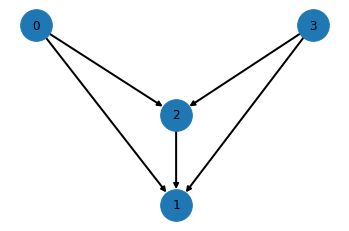

In [ ]:
G = graph_to_nxdigraph(graph_instance_creator(4)) # ejemplo con instancia aleatoria
print(f"Orden topológico: {iterTopologicalSort(G, verbose=True, visualize=True)}")

## 3.2 Algoritmo DFS-recursivo

*   Creamos un **Stack** para almacenar los nodos en **orden topológico**.
*   Creamos un `dict()` llamado `states`, donde marcaremos **cada nodo visitado** y lo inicializamos en `False`.
*   Iteramos todo el grafo por cada nodo
*   Si **el nodo no está visitado**, **llamamos a la función recursiva** de orden topológico, que seguirá los siguientes pasos:
1.  Marcamos el **nodo actual como visitado** en el diccionario `states`
2.  **Iteramos en todos los nodos adyacentes** al nodo actual
3.  Si el **nodo no está marcado como visitado** en el diccionario, **llamamos recursivamente a la función** de orden topológico con ese nodo
4.  **Insertamos el nodo actual en el Stack**
*   Finalmente **retornamos el Stack, que corresponderá a un orden topológico** para el grafo.

### 3.2.1 Ejemplo de ejecución


Supongamos que tenemos la siguiente entrada: un grafo acíclico $G$ de tamaño $6$:

![picture](https://i.imgur.com/7gWecc4.png)

Nuestro diccionario de estados `states` quedaría de la siguiente forma:

$\text{states = }[(0: \text{False}), (1: \text{False}), (2: \text{False}), (3: \text{False}), (4: \text{False}), (5: \text{False})]$

Y nuestro stack auxiliar $S$ estaría vacío:

$S=[]$

Iniciamos en el nodo $0$, llamamos a nuestra función recursiva `recSort(0)`

Marcamos el nodo como visitado, el diccionario `states` quedaria: 

$\text{states = }[(0: \text{True}), (1: \text{False}), (2: \text{False}), (3: \text{False}), (4: \text{False}), (5: \text{False})]$

El nodo $0$ no tiene nodos adyacentes a los que apunte, por lo que lo insertamos al principio del stack $S$, que quedaría:

$S=[0]$

Ahora vamos con el nodo $1$, no está visitado por lo que llamamos a la función recursiva `recSort(1)`.

Marcamos el nodo $1$ como visitado, el diccionario `states` quedaría:

$\text{states = }[(0: \text{True}), (1: \text{True}), (2: \text{False}), (3: \text{False}), (4: \text{False}), (5: \text{False})]$

Ahora, buscamos sus nodos adyacentes e iteramos sobre ellos. En este caso, el nodo $1$ no tiene nodos adyacentes, por lo que simplemente lo insertamos al principio del stack $S$, quedando:

$S=[1,0]$

Volvemos a la función principal, seguimos con el nodo $2$. El nodo no está visitado, por lo que llamamos a la función recursiva `recSort(2)`.

Marcamos el nodo como visitado, el diccionario `states` quedaria: 

$\text{states = }[(0: \text{True}), (1: \text{True}), (2: \text{True}), (3: \text{False}), (4: \text{False}), (5: \text{False})]$

Ahora, buscamos sus nodos adyacentes e iteramos sobre ellos. En este caso, el nodo $2$ solo tiene como adyacente al nodo $3$, por lo que llamamos recursivamente a la función `recSort(3)`.

Marcamos el nodo como visitado, el diccionario `states` quedaria: 

$\text{states = }[(0: \text{True}), (1: \text{True}), (2: \text{True}), (3: \text{True}), (4: \text{False}), (5: \text{False})]$

Ahora, buscamos sus nodos adyacentes e iteramos sobre ellos. En este caso, el nodo $3$ solo tiene como adyacente al nodo $1$, pero este ya fue visitado, por lo que simplemente insertamos el nodo $3$ al principio del stack $S$, quedando de la forma: 

$S=[3,1,0]$.

Ahora que finalizó la llamada recursiva y se acabaron los nodos adyacentes a $2$, insertamos el nodo $2$ en el stack $S$, quedando de la siguiente forma:

$S=[2,3,1,0]$

Y volvemos a la función principal, donde nos saltaremos el nodo $3$ ya que está marcado como visitado. Seguimos con el nodo $4$, llamamos a la función recursiva `recSort(4)`.

Marcamos el nodo como visitado, el diccionario `states` quedaria: 

$\text{states = }[(0: \text{True}), (1: \text{True}), (2: \text{True}), (3: \text{True}), (4: \text{True}), (5: \text{False})]$

Ahora, buscamos sus nodos adyacentes e iteramos sobre ellos. En este caso, el nodo $4$ tiene como adyacentes a los nodos $0$ y $1$, pero estos ya están visitados, por lo que no hacemos ninguna llamada recursiva e insertamos el $4$ al stack $S$, quedando de la forma: 

$S=[4,2,3,1,0]$

Volvemos a la función principal, donde seguimos con el nodo $5$, que al no estar visitado, llamamos a la función `recSort(5)`.

Marcamos el nodo como visitado, el diccionario `states` quedaria: 

$\text{states = }[(0: \text{True}), (1: \text{True}), (2: \text{True}), (3: \text{True}), (4: \text{True}), (5: \text{True})]$

Ahora, buscamos sus nodos adyacentes e iteramos sobre ellos. En este caso, el nodo $5$ tiene como adyacentes a los nodos $0$ y $2$, pero estos ya están visitados, por lo que no hacemos ninguna llamada recursiva e insertamos el $5$ al stack $S$, quedando de la forma: 

$S=[5,4,2,3,1,0]$

Ahora, todos los nodos fueron visitados, por lo que simplemente retornamos el stack $S$, que corresponderá a un **orden topológico para el grafo**:

$S=[5,4,2,3,1,0]$

### 3.2.2 Ejecución paso a paso (`verbose=True`) y visualización del grafo (`visualize=True`)

Nodo 1 no ha sido visitado
Marcamos el nodo 1 como visitado
Buscamos los nodos adyacentes a 1
El nodo 3 adyacente a 1 no ha sido visitado
Llamamos recursivamente a la función
Marcamos el nodo 3 como visitado
Insertamos el nodo 3 al stack
Stack: [3]
Buscamos los nodos adyacentes a 1
El nodo 2 adyacente a 1 no ha sido visitado
Llamamos recursivamente a la función
Marcamos el nodo 2 como visitado
Insertamos el nodo 2 al stack
Stack: [2, 3]
Buscamos los nodos adyacentes a 1
El nodo 0 adyacente a 1 no ha sido visitado
Llamamos recursivamente a la función
Marcamos el nodo 0 como visitado
Buscamos los nodos adyacentes a 0
El nodo 2 adyacente a 0 ya fue visitado
Buscamos los nodos adyacentes a 0
El nodo 3 adyacente a 0 ya fue visitado
Insertamos el nodo 0 al stack
Stack: [0, 2, 3]
Insertamos el nodo 1 al stack
Stack: [1, 0, 2, 3]
Nodo 3 ya fue visitado
Nodo 2 ya fue visitado
Nodo 0 ya fue visitado
Orden topológico: [1, 0, 2, 3]


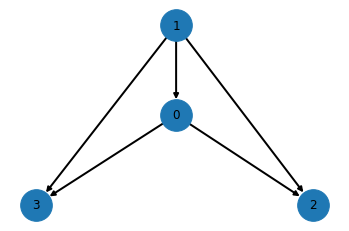

In [ ]:
G = graph_to_nxdigraph(graph_instance_creator(4)) # ejemplo con instancia aleatoria
print(f"Orden topológico: {recTopologicalSort(G, verbose=True, visualize=True)}")

# 4. Correctitud

## **Hipótesis 1**
> *Para cualquier asignación $f(u)$ y $f(v)$ de una conexión $(u,v)$, se cumple que $f(u)>f(v)$*

## **Demostración Hipótesis 1**

Para demostrar esta hipótesis, utilizaremos **inducción matemática.**

**Caso base:** Cuando $n=1$, significa que existe únicamente $1$ nodo dentro del grafo, por lo que no tiene ningún arco. La propiedad se cumple trivialmente para el caso base.

**Paso inductivo:** Cuando $n>1$, el algoritmo comienza iterando en un nodo no explorado del grafo. Este nodo es explorado y posteriormente insertado en el stack junto a sus nodos adyacentes, que serán marcados como descubiertos. Una vez concluido este paso, se repetirá con el siguiente nodo en el stack.

Una vez lleguemos a un nodo $n$ que no tiene otros nodos adyacentes, lo marcamos como visitado y lo insertamos en el stack de orden topológico. Al proceder con el siguiente nodo en la pila, tenemos 2 posibilidades:

*   El siguiente nodo corresponde a un nodo hermano de $n$. Se ejecutará una búsqueda en profundidad. Diremos que esto es correcto por **hipótesis inductiva**

*   El siguiente nodo corresponde al padre de $n$. Ya que sabemos que $G$ es un **grafo dirigido acíclico**, por lo que cuando tenemos una conexión $(u,v)$, no existe una conexión en el sentido de $v$ hasta $u$. Esto significa que se cumple que $f(u) < d(v)$ para cualquier nodo $d(v) < f(v)$. Al juntar las dos desigualdades obtenemos que $f(v)< f(u)$

Finalmente, como la hipótesis se cumple para el caso base y para el paso inductivo, queda demostrada la correctitud del algoritmo Topological Sorting. $\blacksquare$

# 5. Análisis del tiempo de ejecución

## **Teorema 1**
> *El tiempo de ejecución del algoritmo **TopologicalSort** tanto para su implementación iterativa como recursiva tiene un tiempo de ejecución de complejidad $O(n+a)$ donde $a$ es la cantidad de arcos y $n$ es la cantidad de nodos del grafo.*



## **Prueba del Teorema 1**
Para analizar el tiempo de ejecución, basta con ver el código del algoritmo, que realiza 2 principales operaciones:



1.   Ingresar los $n$ nodos al Stack, y cada nodo es ingresado solo una vez ya que luego de ser marcado como visitado, es ignorado en siguientes iteraciones, lo que nos da una complejidad de orden $O(n)$. 
2.   Por cada nodo, el algoritmo recorre todos sus nodos adyacentes, lo que coincide con la **cantidad de arcos**, lo que nos da una complejidad de orden $O(a)$ siendo $a$ la cantidad de arcos.

Al sumar estas complejidades, obtenemos que la complejidad temporal de este algoritmo es $O(n+a)$. $\blacksquare$

# 6. Experimentos

## 6.1 Tiempo de ejecución de los algoritmos en función del tamaño del grafo

Se generarán instancias aleatorias de grafos con tamaño $n \in [10,200]$ y se medirá el tiempo de ejecución de los algoritmos en función del tamaño del problema de entrada $n$.

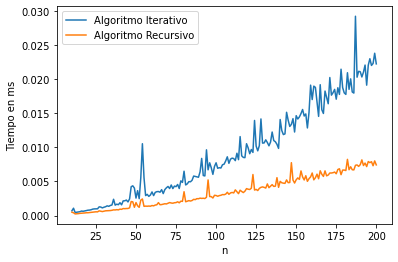

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from timeit import repeat
import networkx as nx

x=[]; y1=[]; y2=[]

for n in range(10,201):

  # creamos instancias aleatorias
  G = graph_instance_creator(n)
  G = H = graph_to_nxdigraph(G)

  iter_t = repeat(setup="from __main__ import iterTopologicalSort", stmt=lambda: iterTopologicalSort(G), repeat=1, number=10)
  rec_t = repeat(setup="from __main__ import recTopologicalSort", stmt=lambda: recTopologicalSort(H), repeat=1, number=10)

  x.append(n)
  y1.append(iter_t)
  y2.append(rec_t)

plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Algoritmo Iterativo", "Algoritmo Recursivo"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

### 6.1.1 Análisis de resultados

Al analizar la gráfica, podemos observar que a pesar de que ambos algoritmos tengan la misma complejidad $O(n+e)$, la implementación recursiva demuestra ser mucho mas eficiente temporalmente hablando en comparación a la versión iterativa. Esto, creemos que se puede deber a que la versión iterativa realiza mas comparaciones del estado de cada nodo.

## 6.2 Comparación de los algoritmos con el algoritmo `topological_sort` de NetworkX

La libreria que utilizamos para crear y visualizar grafos llamada `NetworkX` también posee incorporado un algoritmo de ordenamiento topológico. Se generarán instancias aleatorias de grafos con tamaño $n \in [10,200]$ y se medirá el tiempo de ejecución de los algoritmos en función del tamaño del problema de entrada $n$.

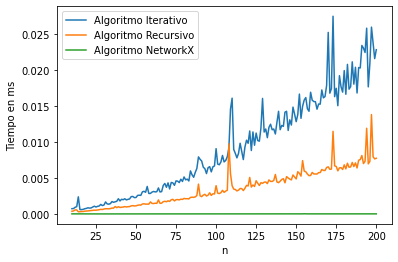

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from timeit import repeat
import networkx as nx

x=[]; y1=[]; y2=[]; y3=[]

def nxtsort(G):
  return nx.algorithms.dag.topological_sort(G)

for n in range(10,201):
  
  # creamos instancias aleatorias
  G = graph_instance_creator(n)
  G = H = I = graph_to_nxdigraph(G)

  iter_t = repeat(setup="from __main__ import iterTopologicalSort", stmt=lambda: iterTopologicalSort(G), repeat=1, number=10)
  rec_t = repeat(setup="from __main__ import recTopologicalSort", stmt=lambda: recTopologicalSort(H), repeat=1, number=10)
  nx_t = repeat(setup="from __main__ import nxtsort", stmt=lambda: nxtsort(I), repeat=1, number=10)

  x.append(n)
  y1.append(iter_t)
  y2.append(rec_t)
  y3.append(nx_t)

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.legend(["Algoritmo Iterativo", "Algoritmo Recursivo", "Algoritmo NetworkX"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

### 6.2.1 Análisis de resultados

Como podemos observar en el gráfico, el algoritmo incluido por la libreria **NetworkX** es bastante mas eficiente que nuestras implementaciones. Creemos que es porque está mucho mejor optimizada, ya que el algoritmo es originalmente del libro ***Introduction to Algorithms: A Creative Approach***, donde al investigar nos dimos cuenta que tiene la misma complejidad que nuestros algoritmos: $O(V+E)$ donde $V$ son los **vértices o nodos** y $E$ **son los arcos (o edges)**.